### 使用Tensflow实现梯度下降

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.linspace(-10., 10., 1000, endpoint = False)
y_data = 3. * x_data + 4. + np.random.normal(size=len(x_data))

# 打乱顺序
x_indexs = np.random.permutation(len(x_data))
x_data = x_data[x_indexs]
y_data = y_data[x_indexs]

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


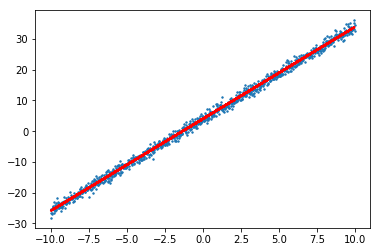

Predicted model: [2.9966311]x + [4.0118976]
CPU times: user 1.03 s, sys: 128 ms, total: 1.16 s
Wall time: 679 ms


In [3]:
%%time

# x 和 y 是我们的训练数据的占位符
x = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化
w = tf.Variable([0.], name="w")
b = tf.Variable([0.],name="b")

# 我们的模型是 y = w * x + b
y_model = w * x + b

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
        x_value = x_data
        y_value = y_data
#         x_value = x_data[i]
#         y_value = y_data[i]
        train_,w_,b_,loss_ = session.run([train_op,w,b,loss], feed_dict={x: x_value, y: y_value})
#         print("step:{i},loss:{loss_},w:{w_},b:{b_}".format(**locals()))  #训练过程
    
    plt.scatter(x_data,y_data,s=2)
    plt.plot(x_data, w_ * x_data + b_, color='red', linewidth=2.0, linestyle='--')
    plt.show()
    
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))

### 多元梯度下降

In [4]:
m=1000
n=10
X_data = np.random.random(size=(m,n))
true_W = np.arange(1,n+1,dtype=float)
true_b = 6.
y_data = np.sum(true_W * X_data,axis=1) + true_b + np.random.normal(size=len(X_data))

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

In [19]:
%%time

# x 和 y 是我们的训练数据的占位符
X = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化
W = tf.Variable(tf.zeros([n],dtype=tf.float32), name="w")
b = tf.Variable(tf.zeros([1],dtype=tf.float32),name="b")

# 我们的模型是 y = w * x + b
X_b = tf.concat([X,tf.ones((m,1))],axis=0)
W_b = tf.concat([b,W],axis=0)

y_model = tf.matmul(X_b,W_b)

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
#         x_value = X_data
#         y_value = y_data
        x_value = X_data[i]
        y_value = y_data[i]
        train_,w_,b_,loss_ = session.run([train_op,W,b,loss], feed_dict={X: x_value, y: y_value})
#       print("step:{i},loss:{loss_},w:{w_},b:{b_}".format(**locals()))    #训练过程
        
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))

ValueError: Shape must be rank 2 but is rank 1 for 'MatMul' (op: 'MatMul') with input shapes: [?,1], [11].